<a href="https://colab.research.google.com/github/Raissa-hue310/Project5-NLP-with-Unsupervised-Learning/blob/main/Project5_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5: Basic Natural Language Processing with Unsupervised Learning
## course: Data Analytics and Business Intelligence Analyst
## Student: Raissa Matho Mekjele

## 1. Text Data Preparation
### 1.1 Load Newsgroups Dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))

texts = newsgroups.data
labels = newsgroups.target
target_names = newsgroups.target_names

len(texts), len(labels)


(18846, 18846)

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)   # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

clean_texts = [preprocess(t) for t in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2. Text Representation
### 2.1 Bag of Words (CountVectorizer)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000)
X_bow = cv.fit_transform(clean_texts)
X_bow.shape


(18846, 5000)

### 2.2 TF-IDF Representation

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(clean_texts)
X_tfidf.shape


(18846, 5000)

### 2.3 Simple Word Embedding Example (Pretrained GloVe)


In [6]:
!pip install gensim
import gensim.downloader as api

# Load pretrained embeddings (small model)
wv = api.load("glove-wiki-gigaword-50")

# Example: compute similarity
wv.similarity("computer", "technology")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 58.2 MB/s eta 0:00:00
[==================================================] 100.0% 66.0/66.0MB downloaded


np.float32(0.8525559)

In [7]:
# Embeddings by averaging word vectors demonstration
import numpy as np

def embed_sentence(sentence):
    words = sentence.split()
    vectors = [wv[w] for w in words if w in wv]
    if len(vectors) == 0:
        return np.zeros(50)
    return np.mean(vectors, axis=0)

X_embed = np.array([embed_sentence(t) for t in clean_texts])
X_embed.shape


(18846, 50)

## 3. Unsupervised Learning Application

We use K-Means on TF-IDF:
### 3.1 K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)

clusters = kmeans.labels_


# 3.2 Analyze Cluster Themes

Identify top terms per cluster:

In [9]:
import numpy as np

terms = tfidf.get_feature_names_out()
order = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print(f"\nCluster {i} top words:")
    print(", ".join(terms[order[i][:15]]))



Cluster 0 top words:
bytes, configuration, machines, cmos, please, portable, dealers, iii, manuals, owners, compatible, defined, documentation, reach, quickly

Cluster 1 top words:
rather, better, bs, explaining, msg, saves, scores, sport, devils, coverage, pittsburgh, rangers, unlike, goals, worst

Cluster 2 top words:
type, weird, types, ab, concepts, occasionally, clue, brief, cool, thanx, advanced, scheme, hey, mentioned, behind

Cluster 3 top words:
mouse, windows, keyboard, driver, card, port, problem, dos, serial, cursor, com, button, 31, drive, computer

Cluster 4 top words:
elected, clinton, little, behind, chip, bill, republicans, probably, president, clipper, cia, 96, fallen, executive, democratic

Cluster 5 top words:
spectrum, blue, people, since, quantum, tube, fits, see, physics, lights, could, false, definition, get, possibly

Cluster 6 top words:
koresh, fbi, 90, bd, tactics, atf, davidians, edge, branch, compound, kept, outside, death, offer, david

Cluster 7 top wor

## 4. Model Evaluation & Prediction
### 4.1 Silhouette Score

In [10]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, clusters)
score


np.float64(-0.01821448426962802)

A score above 0.1 is acceptable for text clustering.
## 4.2 Predict Cluster for New Text

In [11]:
sample = ["The new graphics card from Nvidia improves performance for gamers."]
sample_clean = preprocess(sample[0])
sample_tfidf = tfidf.transform([sample_clean])

pred = kmeans.predict(sample_tfidf)
pred


array([7], dtype=int32)

## 5. Visualization
### 5.1 PCA Visualization (2D)

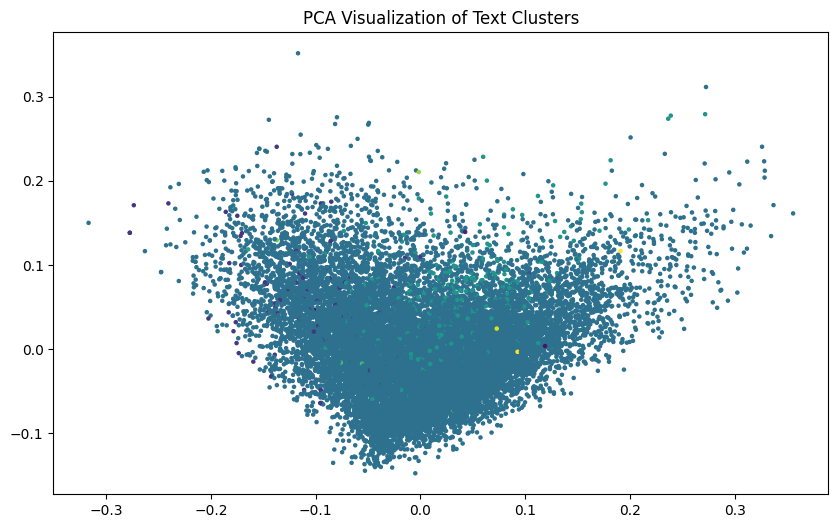

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=5)
plt.title("PCA Visualization of Text Clusters")
plt.show()


### 5.2 t-SNE Visualization



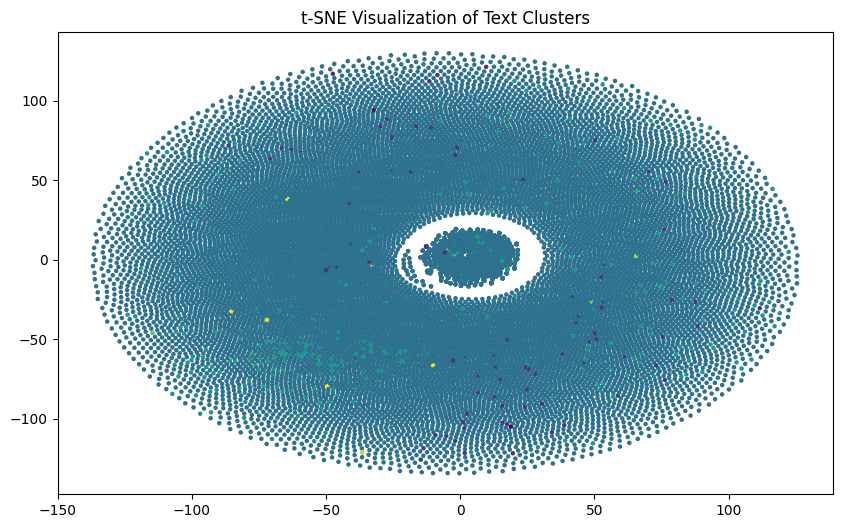

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, s=5)
plt.title("t-SNE Visualization of Text Clusters")
plt.show()
